## Traffic Flow Prediction; Italy Road Networks

Traffic congestion is a significant issue in urban areas, leading to delays, increased fuel consumption, and environmental pollution. Accurate traffic flow prediction is essential for effective traffic management, urban planning, and improving road safety.

This network consists of nodes representing different locations in Italy and edges representing roads connecting those spots. In this project, the road network of Italy is represented as a graph, where intersections (nodes) are connected by roads (edges). This allows us to analyze the network using deep learning graph theory and machine learning techniques, and to simulate how different factors—such as road closures—affect traffic flow. Furthermore, we implement a Graph Convolutional Network (GCN) to predict traffic flow based on node-level traffic data.



In [84]:
#!pip install nxviz
#!pip install torch-geometric

In [85]:
import networkx as nx
import nxviz as nv
import numpy as np
import matplotlib.pyplot as plt
import random

The dataset used in this project is sourced from the Purdue University Network Repository (https://networkrepository.com/index.php). The dataset used for this project comprises traffic flow data from the Italy road network. The edges represent roads, and the nodes signify intersections.

{'2': Text(-0.26660624146461487, 0.10612370073795319, '2'),
 '1': Text(-0.3110460340976715, 0.0745692029595375, '1'),
 '6808': Text(-0.3462192416191101, 0.05949003994464874, '6808'),
 '3': Text(-0.2183692902326584, 0.15077954530715942, '3'),
 '4': Text(-0.16879117488861084, 0.20344258844852448, '4'),
 '5': Text(-0.12224286794662476, 0.2641237676143646, '5'),
 '6': Text(-0.08070383965969086, 0.3292131721973419, '6'),
 '7': Text(-0.04779897630214691, 0.3977592885494232, '7'),
 '8': Text(-0.02452479861676693, 0.46576422452926636, '8'),
 '9': Text(-0.01222412008792162, 0.5312719941139221, '9'),
 '10': Text(-0.010197713971138, 0.590537965297699, '10'),
 '11': Text(-0.017729444429278374, 0.6397928595542908, '11'),
 '12': Text(-0.03706470504403114, 0.6720041036605835, '12'),
 '13': Text(-0.06827441602945328, 0.6815863847732544, '13'),
 '14': Text(-0.10095132142305374, 0.7024710774421692, '14'),
 '15': Text(-0.1272369772195816, 0.7422366142272949, '15'),
 '16': Text(-0.1473408341407776, 0.7857

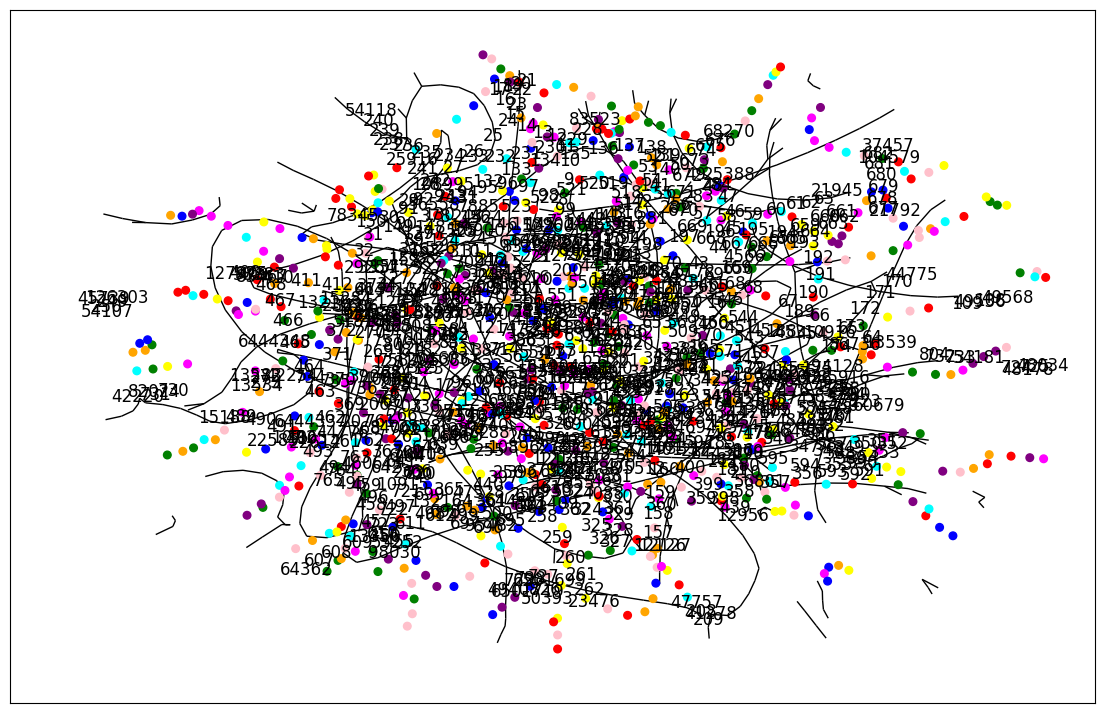

In [86]:
#Load Roads Network
G = nx.read_edgelist("road-italy-osm.edges", comments='%')

plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G), node_size=30, node_color=[random.choice(['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink', 'cyan', 'magenta']) for _ in range(len(G))])
nx.draw_networkx_edges(G, pos=nx.spring_layout(G))   #these nx.spring_layout(G) determines node positions
nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

Each point represents a node (vertex) in the graph.

In [87]:
#Check stats
print(f"Number of Nodes: {len(G.nodes())}")
print(f"Number of Edges: {len(G.edges())}")

Number of Nodes: 890
Number of Edges: 853


Nodes represent specific points or locations in Italy. Edges represent the roads or paths connecting these locations. Each edge between two nodes indicates that there is a road segment connecting those two points.

In [114]:
#Calculating Assortativity of the graph
assortativity = nx.degree_assortativity_coefficient(G)
assortativity

-0.34523100690365427

Assortativity measures the tendency of nodes to connect to other nodes that are similar in some way. We got negative assortativity value that suggests a preference for hubs to connect to less connected nodes. While a positive assortativity indicates that nodes tend to connect to other nodes with similar degrees.

### Degree and Betweenness Centrality Calculation

Degree Centrality measures how many connections a node has.

In [116]:
#Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'2': 0.0022497187851518562,
 '1': 0.0022497187851518562,
 '6808': 0.0011248593925759281,
 '3': 0.0022497187851518562,
 '4': 0.0022497187851518562,
 '5': 0.0022497187851518562,
 '6': 0.0022497187851518562,
 '7': 0.0022497187851518562,
 '8': 0.0022497187851518562,
 '9': 0.0022497187851518562,
 '10': 0.0022497187851518562,
 '11': 0.0022497187851518562,
 '12': 0.0022497187851518562,
 '13': 0.0022497187851518562,
 '14': 0.0022497187851518562,
 '15': 0.0022497187851518562,
 '16': 0.0022497187851518562,
 '17': 0.0022497187851518562,
 '18': 0.0022497187851518562,
 '19': 0.0022497187851518562,
 '20': 0.0022497187851518562,
 '21': 0.0022497187851518562,
 '22': 0.0022497187851518562,
 '23': 0.0022497187851518562,
 '24': 0.0022497187851518562,
 '25': 0.0022497187851518562,
 '26': 0.0022497187851518562,
 '27': 0.0022497187851518562,
 '28': 0.0022497187851518562,
 '29': 0.0022497187851518562,
 '30': 0.0022497187851518562,
 '31': 0.0022497187851518562,
 '32': 0.0022497187851518562,
 '33': 0.00224971

Betweenness Centrality measures how often a node acts as a bridge along the shortest path between two other nodes.

In [117]:
#Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'2': 0.0003141499204491331,
 '1': 0.00015960842732496276,
 '6808': 0.0,
 '3': 0.0004636244793725109,
 '4': 0.0006080321040950963,
 '5': 0.0007473727946168892,
 '6': 0.0008816465509378896,
 '7': 0.0010108533730580976,
 '8': 0.001134993260977513,
 '9': 0.001254066214696136,
 '10': 0.0013680722342139667,
 '11': 0.0014770113195310046,
 '12': 0.0015808834706472503,
 '13': 0.0016796886875627035,
 '14': 0.0017734269702773641,
 '15': 0.0018620983187912323,
 '16': 0.001945702733104308,
 '17': 0.002024240213216591,
 '18': 0.002097710759128082,
 '19': 0.0021661143708387805,
 '20': 0.0022294510483486865,
 '21': 0.0022877207916577997,
 '22': 0.002340923600766121,
 '23': 0.002389059475673649,
 '24': 0.002432128416380385,
 '25': 0.0024701304228863285,
 '26': 0.0025030654951914795,
 '27': 0.002530933633295838,
 '28': 0.002553734837199404,
 '29': 0.002571469106902178,
 '30': 0.002584136442404159,
 '31': 0.0025917368437053476,
 '32': 0.002594270310805744,
 '33': 0.0025917368437053476,
 '34': 0.00258413

In [118]:
#top 5 important nodes based on centrality
top_deg_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_bet_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nodes by Degree Centrality:", top_deg_nodes)
print("Top 5 nodes by Betweenness Centrality:", top_bet_nodes)

Top 5 nodes by Degree Centrality: [('691', 0.0044994375703037125), ('157', 0.0033745781777277844), ('174', 0.0033745781777277844), ('175', 0.0033745781777277844), ('183', 0.0033745781777277844)]
Top 5 nodes by Betweenness Centrality: [('547', 0.00958157257369856), ('548', 0.00958157257369856), ('546', 0.009576505639497766), ('549', 0.009576505639497766), ('545', 0.00956637177109618)]


Text(0.5, 1.0, 'Top 5 Nodes by Degree Centrality')

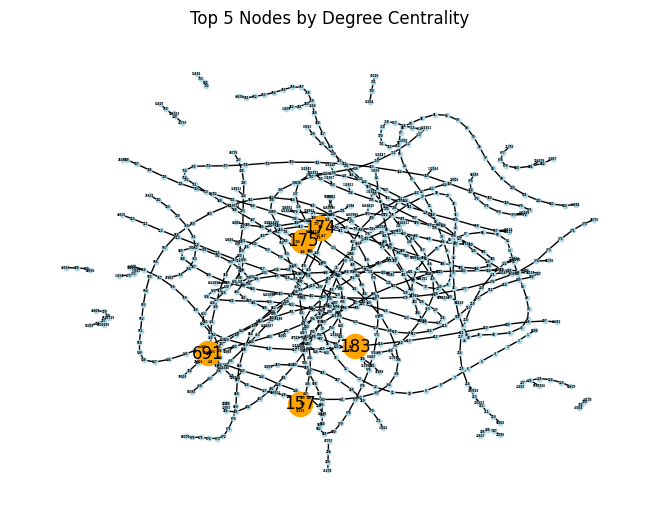

In [187]:
# Plotting the top 5 important nodes

#Degree Centrality
nx.draw(G, with_labels=True, node_size=10, node_color='lightblue', font_size=2, font_weight='bold')
top_deg_labels = {node: node for node, _ in top_deg_nodes}
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=top_deg_labels.keys(), node_color='orange')
nx.draw_networkx_labels(G, pos, labels=top_deg_labels, font_color='black')
plt.title('Top 5 Nodes by Degree Centrality')

<ipython-input-185-ed0b4269f829>:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


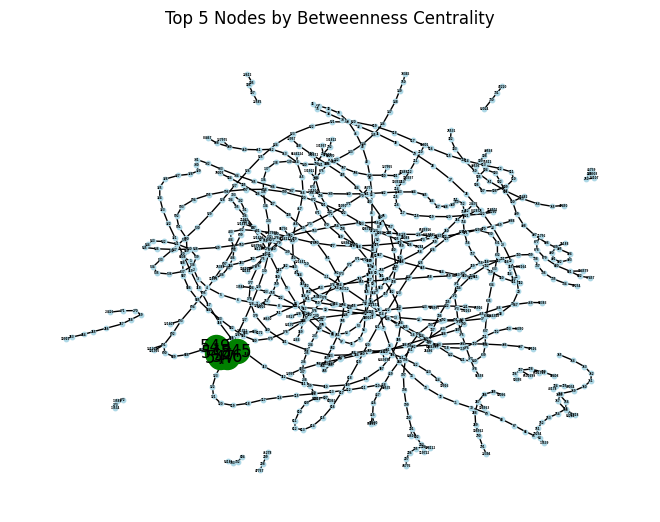

In [185]:
#Betweenness Centrality
nx.draw(G, with_labels=True, node_size=10, node_color='lightblue', font_size=2, font_weight='bold')
top_bet_labels = {node: node for node, _ in top_bet_nodes}
nx.draw_networkx_nodes(G, pos, nodelist=top_bet_labels.keys(), node_color='green')
nx.draw_networkx_labels(G, pos, labels=top_bet_labels, font_color='black')
plt.title('Top 5 Nodes by Betweenness Centrality')

plt.tight_layout()
plt.show()

### Clustering: Identifying Road Communities

These clusters represent groups of roads that are more densely connected to each other than to the rest of the network.

<ipython-input-122-d0a908f8b82c>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, node_size=10, node_color=node_colors, edge_color='gray', cmap=plt.cm.get_cmap('rainbow'))


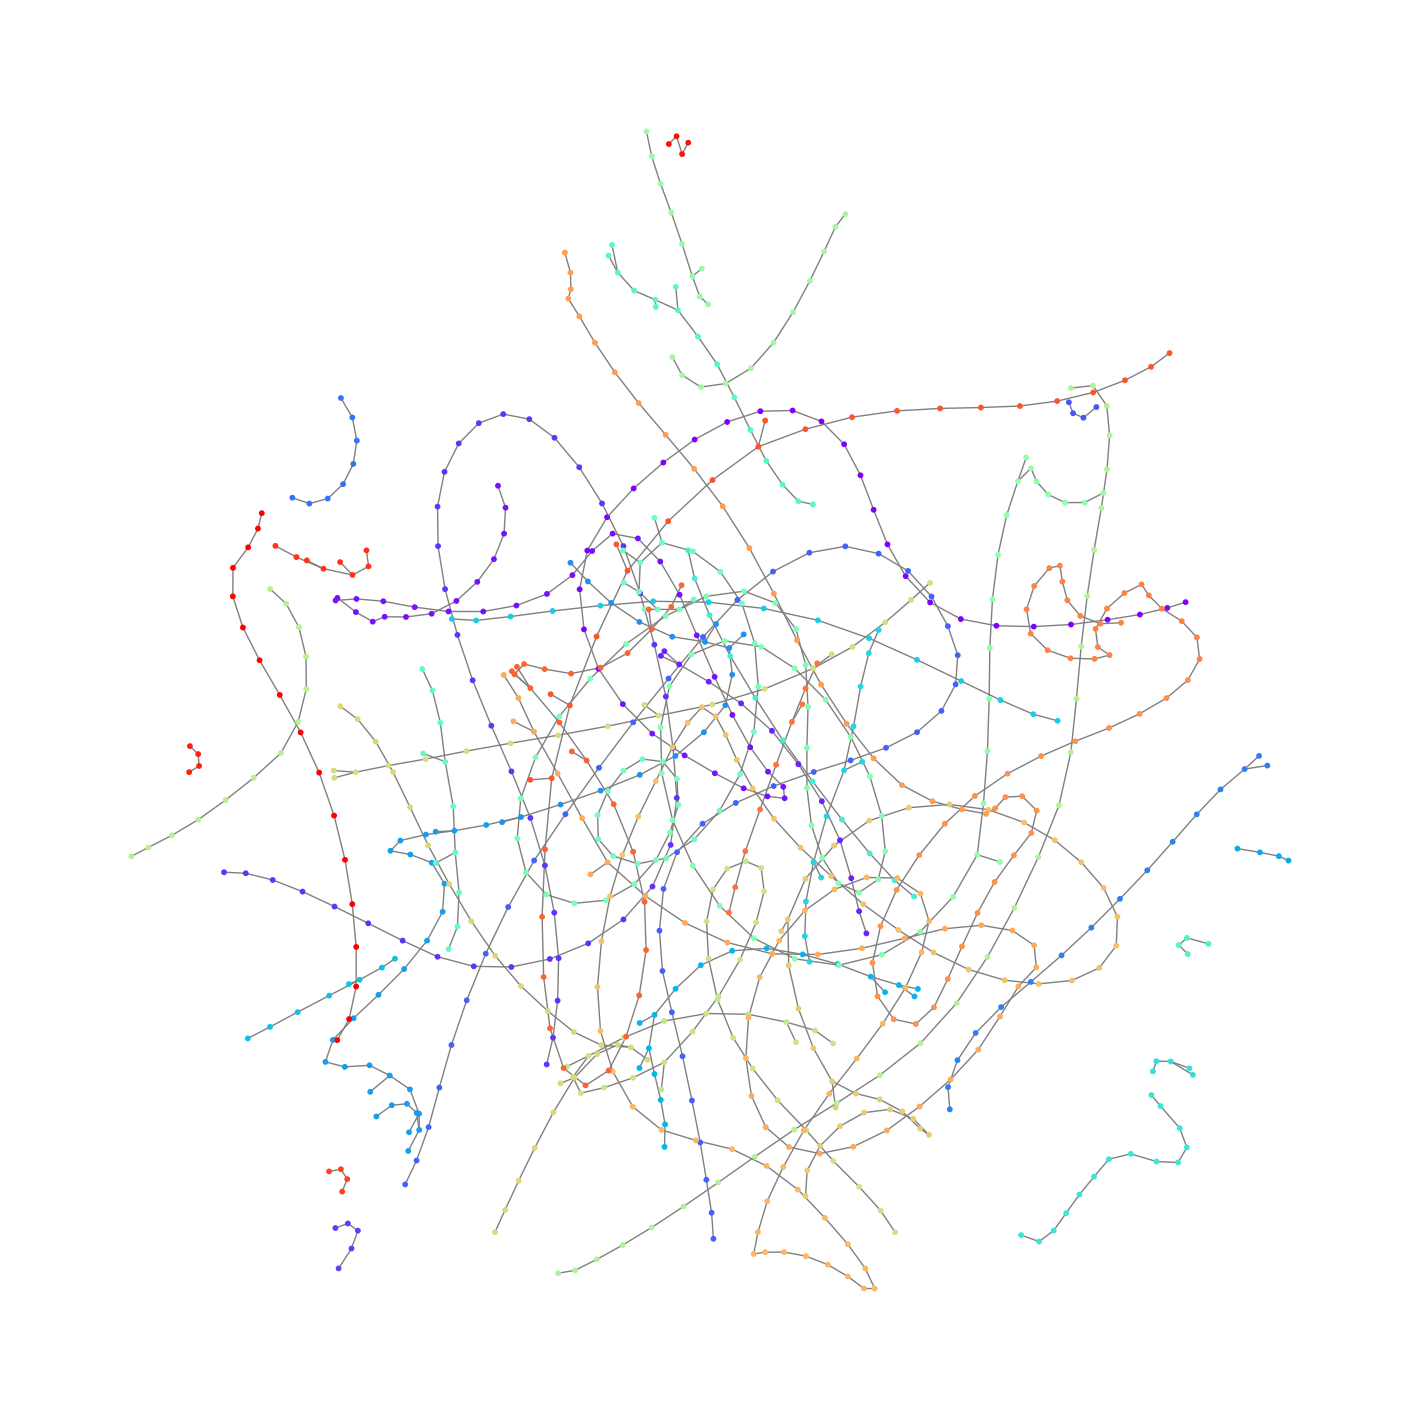

In [122]:
from community import community_louvain             #Louvain Modularity

communities = community_louvain.best_partition(G)  # Perform community detection using Louvain
node_colors = [communities[node] for node in G.nodes()]
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=10, node_color=node_colors, edge_color='gray', cmap=plt.cm.get_cmap('rainbow'))
plt.show()

### Simulating Road Closures and Their Impact

Simulating Road Closures to assess the impact of road closures on the network.

In [131]:
#Function to remove roads (edges) and analyze network impact
def simulate_road_closure(G, edges_to_remove):
    G_copy = G.copy()
    G_copy.remove_edges_from(edges_to_remove)

    new_centrality = nx.degree_centrality(G_copy)
    num_components = nx.number_connected_components(G_copy)

    print(f"Number of connected components after closure:{num_components}")
    return new_centrality

#Let say randomly simulate closure of 5 random roads
edgesClose = random.sample(list(G.edges()), 5)
newCentrality = simulate_road_closure(G, edgesClose)

Number of connected components after closure: 42


### Shortest Path Prediction Using Dijkstra’s Algorithm

Dijkstra's algorithm compute the shortest path between two locations in the road network. This is important for traffic flow prediction, as finding efficient routes can alleviate congestion.

In [132]:
# Dijkstra's shortest path algorithm
source_node = '112'   #Sample start node
target_node = '126'   #Sample target node

shortest_path = nx.dijkstra_path(G, source=source_node, target=target_node)
print(f"Shortest path from {source_node} to {target_node}: {shortest_path}")

Shortest path from 112 to 126: ['112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126']


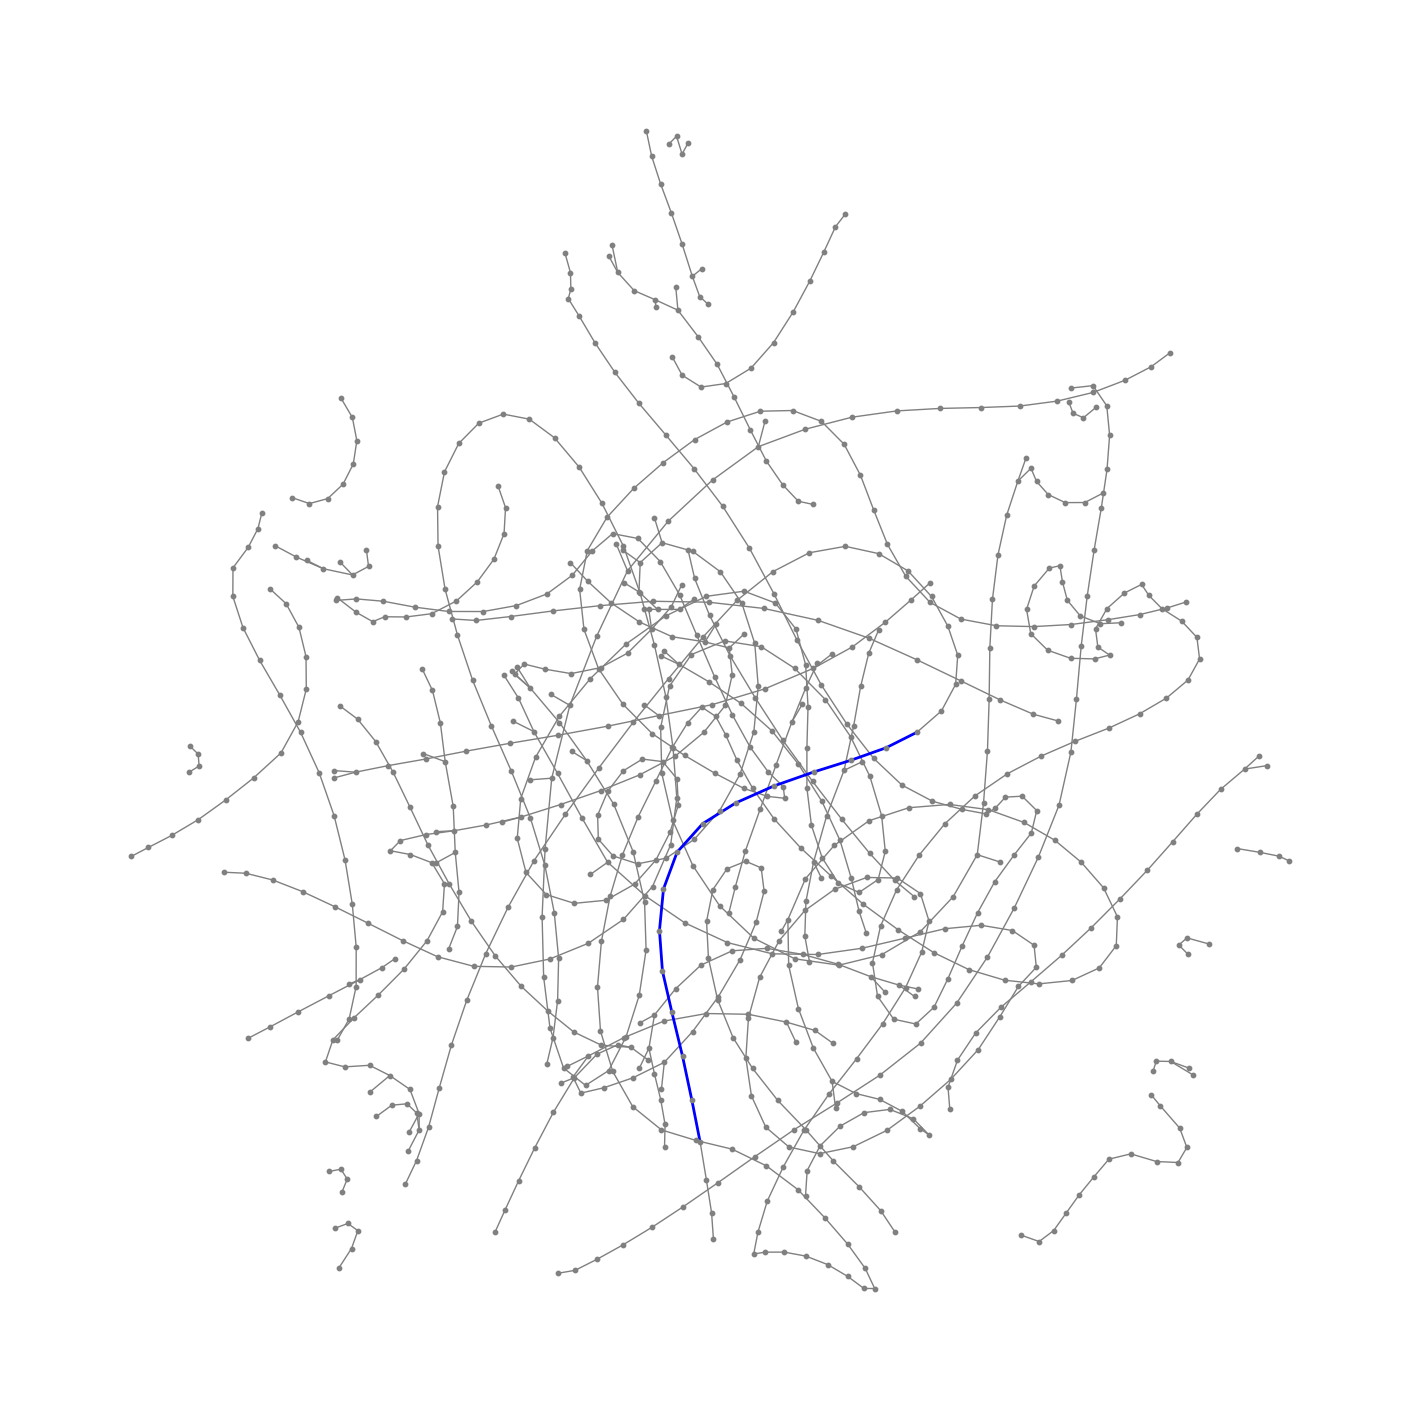

In [133]:
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
plt.figure(figsize=(14, 14))
nx.draw(G, pos, node_size=10, node_color='grey', edge_color='gray')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)
plt.show()

### Traffic Flow Prediction Using Graph Convolutional Networks (GCNs)

In [149]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch.utils.data import random_split
from sklearn.metrics import mean_squared_error

In [169]:
traffic = {node: random.uniform(0, 1) for node in G.nodes()}   #traffic flow at each node; simulating random values for nodes

In [170]:
#tensor- list of traffic values for each node
nodeFeatures = torch.tensor([traffic[node] for node in G.nodes()], dtype=torch.float).view(-1, 1)

In [171]:
# Converting to Geometric Data form

nodeToIndex = {node: i for i, node in enumerate(G.nodes())}   # Create a mapping from node identifiers to consecutive integers
edge_index = torch.tensor([[nodeToIndex[u], nodeToIndex[v]] for u, v in G.edges()], dtype=torch.long).t().contiguous()   #converting node identifiers in edge_index to integers

#PyTorch Geometric Data
data = Data(x=nodeFeatures, edge_index=edge_index)
data

Data(x=[890, 1], edge_index=[2, 853])

In [172]:
#GCN model
class GCN(nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(1, 16)          # input feature (traffic) = 1, output features = 16
        self.conv2 = GCNConv(16, 32)         # input features = 16, output features=32
        self.fc = nn.Linear(32, 1)           # Fully connected layer to predicted traffic flow

    def forward(self, data):
        x = data.x                          # Node features (initially traffic data at each node)
        x = self.conv1(x, data.edge_index)  # First GCN layer
        x = torch.relu(x)                   # Activation Relu function
        x = self.conv2(x, data.edge_index)  # Second GCN layer
        x = torch.relu(x)                   # Activation Relu function
        x = self.fc(x)                      # Fully connected layer to predict final output
        return x

In [173]:
model = GCN()
output = model(data)
print(output)

tensor([[0.1625],
        [0.1598],
        [0.1556],
        [0.1596],
        [0.1579],
        [0.1605],
        [0.1601],
        [0.1563],
        [0.1557],
        [0.1549],
        [0.1557],
        [0.1591],
        [0.1605],
        [0.1587],
        [0.1572],
        [0.1583],
        [0.1590],
        [0.1588],
        [0.1574],
        [0.1558],
        [0.1559],
        [0.1579],
        [0.1568],
        [0.1553],
        [0.1568],
        [0.1569],
        [0.1558],
        [0.1564],
        [0.1607],
        [0.1625],
        [0.1608],
        [0.1586],
        [0.1548],
        [0.1532],
        [0.1540],
        [0.1554],
        [0.1572],
        [0.1574],
        [0.1562],
        [0.1552],
        [0.1542],
        [0.1534],
        [0.1570],
        [0.1592],
        [0.1556],
        [0.1539],
        [0.1541],
        [0.1532],
        [0.1532],
        [0.1538],
        [0.1550],
        [0.1569],
        [0.1570],
        [0.1575],
        [0.1578],
        [0

<ipython-input-183-5aa9e2b83fd8>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Predicted Traffic Flow')  # Pass the ScalarMappable object to colorbar


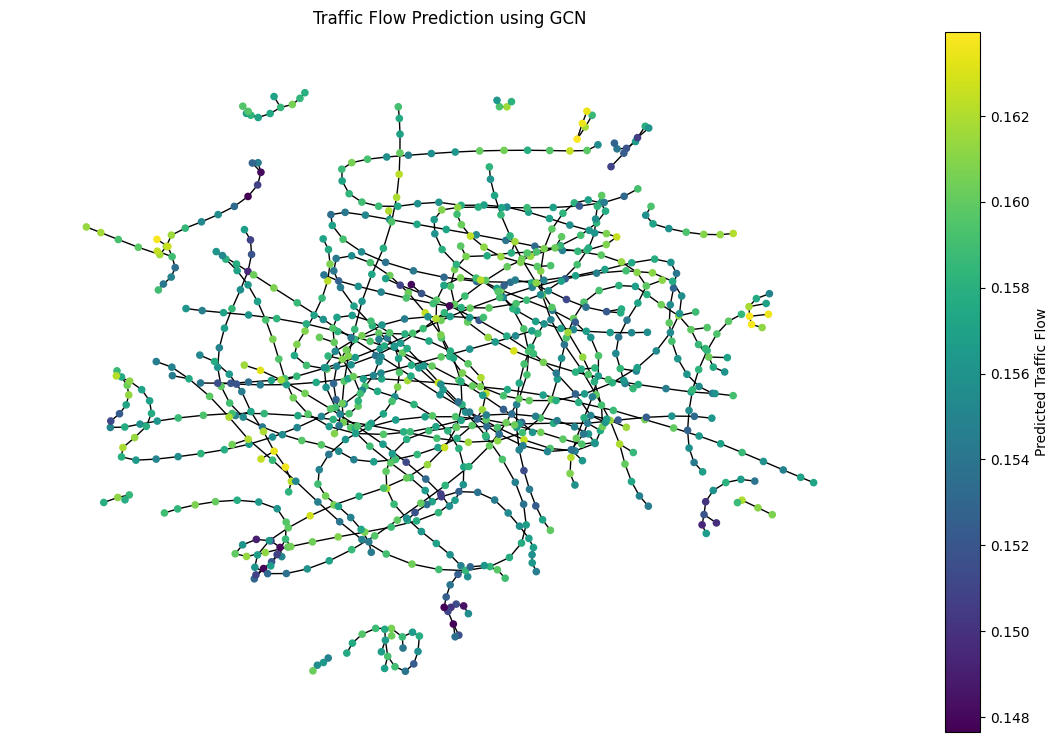

In [183]:
#Assuming output contains the predicted traffic flow from the GCN model
predicted_traffic = output.detach().numpy()
node_colors = predicted_traffic.flatten()


sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])  #Just to avoid an error that I am facing


plt.figure(figsize=(11, 7))
nx.draw(G, pos, node_color=node_colors, cmap='viridis', with_labels=False, node_size=20)
plt.colorbar(sm, label='Predicted Traffic Flow')  # Pass the ScalarMappable object to colorbar
plt.title('Traffic Flow Prediction using GCN')
plt.show()